In [1]:
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import sys
import json
import os
sys.path.append("/afs/cs.stanford.edu/u/awni/scr/ecg-master/ecg")
import wave_load
%matplotlib notebook

Using TensorFlow backend.


In [2]:
base = "/afs/cs.stanford.edu/u/awni/scr/ecg-master/"
model_base = os.path.join(base,"saved/wave_models/default/1487989388-17/")
model_path = os.path.join(model_base, "1.025-0.688-056-0.417-0.858.hdf5")
params = json.load(open(os.path.join(model_base, "params.json")))
params['data_path'] = os.path.join(base, "data/waves")
loader = wave_load.load_train(params)

Constructing Training Set...
Constructing Test Set...
Counter({u'normal_base': 171965, u'T': 117281, u'narrow_QRS': 50301, u'sinus_P': 27812, u'flutter_base': 24434, u'fib_base': 24248, u'wide_QRS': 13094, u'noise_base': 10979, u'ectopic_P': 3886})
Fitting Normalization: robust_scale
Applying Normalization...
Applying Normalization...


/afs/cs.stanford.edu/u/awni/scr/ecg-master/ecg/featurize.py:16: UserWarning: Expanding Dimensions...
  warnings.warn("Expanding Dimensions...")


Length of training set 222
Length of test set 81
Output dimension 9


In [3]:
def get_all_model_predictions(x_val):
    model = load_model(model_path)
    predictions = model.predict(x_val, verbose=1)
    return predictions

In [4]:
x = loader.x_test
predictions = get_all_model_predictions(x)

81/81 [==============================] - 0s     


[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
{0: u'T', 1: u'ectopic_P', 2: u'fib_base', 3: u'flutter_base', 4: u'narrow_QRS', 5: u'noise_base', 6: u'normal_base', 7: u'sinus_P', 8: u'wide_QRS'}


<IPython.core.display.Javascript object>


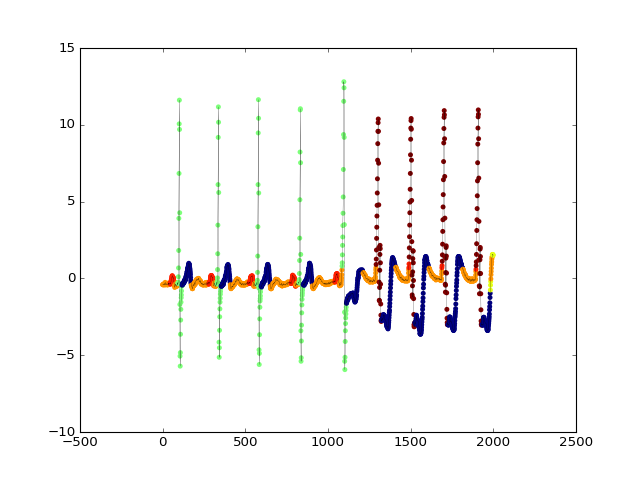

In [6]:
#print np.argmax(predictions[0,:100,:], axis=1)
idx = 3
ecg = x[idx,:].squeeze()

preds = np.argmax(predictions[idx,:,:], axis=1).squeeze()
print(preds[1493:1519])
print(loader.int_to_class)
preds = preds / float(max(preds))

plt.scatter(range(len(ecg)), ecg, marker='o', edgecolor='none',c=preds)
plt.plot(ecg, color='k', linewidth='0.2')


In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import tabulate
classes = loader.classes
preds = np.argmax(predictions, axis=2).ravel()
gts = np.argmax(loader.y_test, axis=2).ravel()
print classification_report(gts, preds, target_names=loader.classes)
cnf_matrix = confusion_matrix(gts, preds).tolist()
for i, row in enumerate(cnf_matrix):
    row.insert(0, classes[i])
print tabulate.tabulate(cnf_matrix, headers=[c[:3] for c in classes])

              precision    recall  f1-score   support

           T       0.83      0.86      0.84     37305
   ectopic_P       0.08      0.03      0.04       964
    fib_base       0.28      0.15      0.19     18135
flutter_base       0.40      0.42      0.41      9701
  narrow_QRS       0.85      0.83      0.84     16456
  noise_base       0.61      0.37      0.46      8917
 normal_base       0.69      0.84      0.76     55207
     sinus_P       0.63      0.57      0.60     10344
    wide_QRS       0.72      0.68      0.70      4971

 avg / total       0.66      0.69      0.67    162000

                  T    ect    fib    flu    nar    noi    nor    sin    wid
------------  -----  -----  -----  -----  -----  -----  -----  -----  -----
T             32262      0    568    370    513    693   2408     80    411
ectopic_P         0     30     50     57      5      0    335    481      6
fib_base       1129     73   2646   2935    296     76  10744    232      4
flutter_base    611    